In [59]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

In [60]:
def SmilesMCStoGridImage(smiles: list[str] or dict[str, str], align_substructure: bool = True, verbose: bool = False, **kwargs):
     """
     Convert a list (or dictionary) of SMILES strings to an RDKit grid image of the maximum common substructure (MCS) match between them

     :returns: RDKit grid image, and (if verbose=True) MCS SMARTS string and molecule, and list of molecules for input SMILES strings
     :rtype: RDKit grid image, and (if verbose=True) string, molecule, and list of molecules
     :param molecules: The SMARTS molecules to be compared and drawn
     :type molecules: List of (SMARTS) strings, or dictionary of (SMARTS) string: (legend) string pairs
     :param align_substructure: Whether to align the MCS substructures when plotting the molecules; default is True
     :type align_substructure: boolean
     :param verbose: Whether to return verbose output (MCS SMARTS string and molecule, and list of molecules for input SMILES strings); default is False so calling this function will present a grid image automatically
     :type verbose: boolean
     """
     mols = [Chem.MolFromSmiles(smile) for smile in smiles]
     res = rdFMCS.FindMCS(mols, **kwargs)
     mcs_smarts = res.smartsString
     mcs_mol = Chem.MolFromSmarts(res.smartsString)
     smarts = res.smartsString
     smart_mol = Chem.MolFromSmarts(smarts)
     smarts_and_mols = [smart_mol] + mols

     smarts_legend = "Max. substructure match"

     # If user supplies a dictionary, use the values as legend entries for molecules
     if isinstance(smiles, dict):
          mol_legends = [smiles[molecule] for molecule in smiles]
     else:
          mol_legends = ["" for mol in mols]

     legends =  [smarts_legend] + mol_legends
    
     matches = [""] + [mol.GetSubstructMatch(mcs_mol) for mol in mols]

     subms = [x for x in smarts_and_mols if x.HasSubstructMatch(mcs_mol)]

     Chem.Compute2DCoords(mcs_mol)

     if align_substructure:
          for m in subms:
               _ = Chem.GenerateDepictionMatching2DStructure(m, mcs_mol)

     drawing = Draw.MolsToGridImage(smarts_and_mols, highlightAtomLists=matches, legends=legends)

     if verbose:
          return drawing, mcs_smarts, mcs_mol, mols
     else:
          return drawing

In [61]:
drawing, mcs_smarts, mcs_mol, mols = SmilesMCStoGridImage(["c1ccccc1O", "O=C(O)c1ccccc1O"], verbose=True)

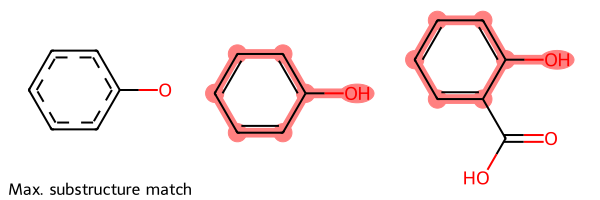

In [62]:
drawing

`mcs_smarts` is the SMARTS string for the maximum common substructure (MCS):

In [63]:
mcs_smarts

'[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[#8]'

`mcs_mol` is the molecular representation of that MCS:

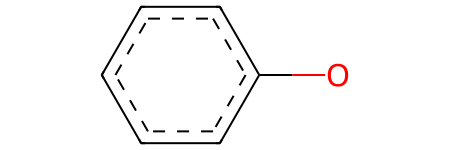

In [64]:
mcs_mol

In [65]:
from rdkit.Chem import rdChemReactions

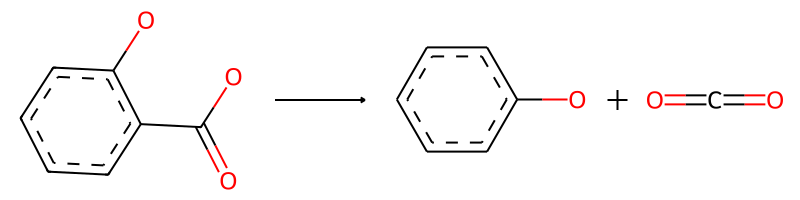

In [66]:
decarboxylation = rdChemReactions.ReactionFromSmarts("[#8]=[#6](-[#8])-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[#8]>>[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[#8].O=C=O")
Draw.ReactionToImage(decarboxylation)

## Pictet-Spengler rxn

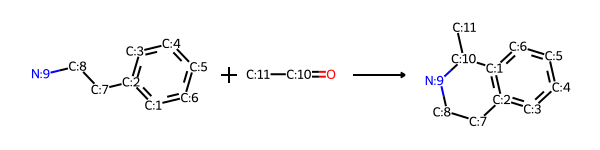

In [67]:
from rdkit.Chem import AllChem

rxn_fwd = AllChem.ReactionFromSmarts('[cH1:1]1:[c:2](-[CH2:7]-[CH2:8]-[NH2:9]):[c:3]:[c:4]:[c:5]:[c:6]:1.[#6:11]-[CH1;R0:10]=[OD1]>>[c:1]12:[c:2](-[CH2:7]-[CH2:8]-[NH1:9]-[C:10]-2(-[#6:11])):[c:3]:[c:4]:[c:5]:[c:6]:1')
rxn_fwd

In [68]:
# Show the reactant templates for the forward reaction
rxn_fwd_reactant_templates = []
for reactant_index in range(rxn_fwd.GetNumReactantTemplates()):
    rxn_fwd_reactant_templates.append(rxn_fwd.GetReactantTemplate(reactant_index))
# rxn_fwd_reactant_templates[1]
Draw.MolsToGridImage(rxn_fwd_reactant_templates)

[17:10:18] 

****
Pre-condition Violation
getExplicitValence() called without call to calcExplicitValence()
Violation occurred on line 308 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-10.9-x86_64-cpython-310/rdkit/Code/GraphMol/Atom.cpp
Failed Expression: d_explicitValence > -1
****



RuntimeError: Pre-condition Violation
	getExplicitValence() called without call to calcExplicitValence()
	Violation occurred on line 308 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_explicitValence > -1
	RDKIT: 2022.09.1
	BOOST: 1_78


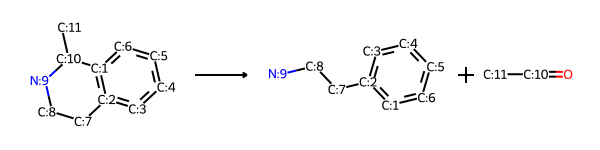

In [ ]:
rxn_rev = AllChem.ChemicalReaction()
for i in range(rxn_fwd.GetNumReactantTemplates()):
    rxn_rev.AddProductTemplate(rxn_fwd.GetReactantTemplate(i))
for i in range(rxn_fwd.GetNumProductTemplates()):
    rxn_rev.AddReactantTemplate(rxn_fwd.GetProductTemplate(i))
rxn_rev.Initialize()
rxn_rev

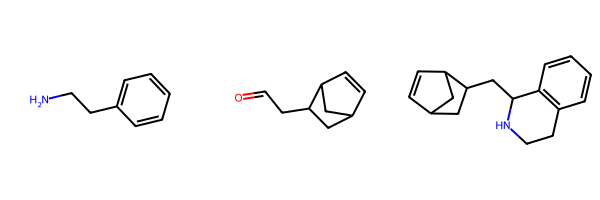

In [125]:
# reacts = [Chem.MolFromSmiles(m) for m in ('NCCc1ccccc1','O=CCC1CC2CCC1C2')]
# reacts = [Chem.MolFromSmiles(m) for m in ('NCCc1ccccc1','C12CC(C(C=C1)CC2)CC=O')]
reacts_bicyclic = [Chem.MolFromSmiles(m) for m in ('NCCc1ccccc1','O=CCC1CC2CC1C=C2')]
ps_bicyclic = rxn_fwd.RunReactants(reacts_bicyclic)
ps0_bicyclic = ps_bicyclic[0]
for p in ps0_bicyclic:
    Chem.SanitizeMol(p)
Draw.MolsToGridImage(reacts_bicyclic + [ps0_bicyclic[0]])

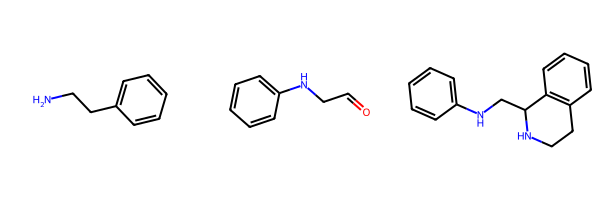

In [126]:
reacts_aniline = [Chem.MolFromSmiles(m) for m in ('NCCc1ccccc1','c1ccccc1NCC(=O)')]
ps_aniline = rxn_fwd.RunReactants(reacts_aniline)
ps0_aniline = ps_aniline[0]
for p in ps0_aniline:
    Chem.SanitizeMol(p)
Draw.MolsToGridImage(reacts_aniline + [ps0_aniline[0]])

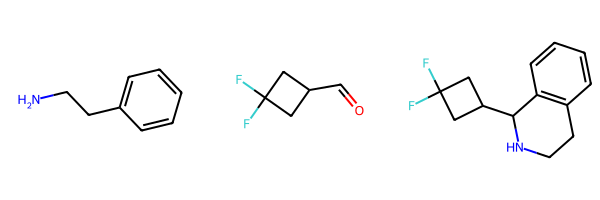

In [127]:
reacts_cyclobutyl = [Chem.MolFromSmiles(m) for m in ('NCCc1ccccc1','C1C(F)(F)CC1C(=O)')]
ps = rxn_fwd.RunReactants(reacts_cyclobutyl)
ps0_cyclobutyl = ps[0]
for p in ps0_cyclobutyl:
    Chem.SanitizeMol(p)
Draw.MolsToGridImage(reacts_cyclobutyl + [ps0_cyclobutyl[0]])

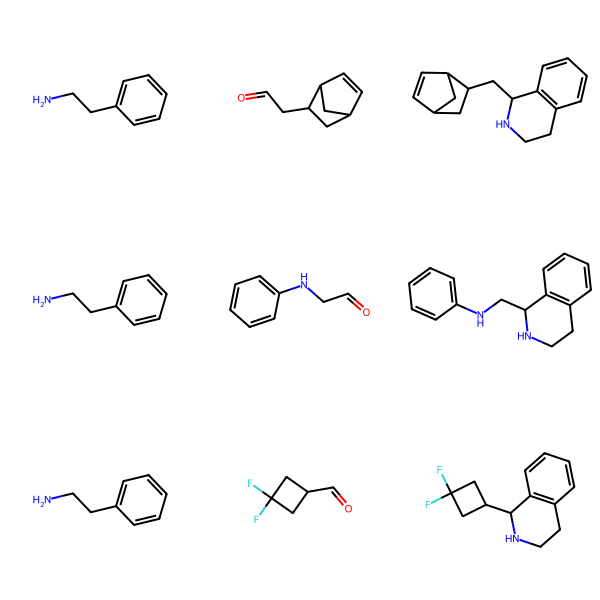

In [128]:
Draw.MolsToGridImage(reacts_bicyclic + [ps0_bicyclic[0]] + reacts_aniline + [ps0_aniline[0]] + reacts_cyclobutyl + [ps0_cyclobutyl[0]], molsPerRow=3)

In [ ]:
reacts_F = [Chem.MolFromSmiles(m) for m in ('NCCc1ccccc1F','C1CC1C(=O)')]
ps_F = rxn_fwd.RunReactants(reacts_F)
Draw.ReactionToImage(ps_F)
rdChemReactions.ReactionFromSmarts

AttributeError: 'tuple' object has no attribute 'GetNumReactantTemplates'